In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch, stft, butter, lfilter, sosfilt

In [4]:
def peak_amplitude_stft(tod, fs, nperseg, driving_freq):
    
    ff, tt, Zxx = stft(tod, fs=fs, nperseg=nperseg)
    # Take only the magnitude of STFT
    sig = np.abs(Zxx)
    f = np.where(ff==driving_freq)[0][0]

    # time, peak amplitude^2, sample frequency, sftp
    return tt, sig[f], ff, Zxx

In [116]:
def get_filtered_signal(data, f_hp=10000, f_lp=100000):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0]))) * 1000 # Sampling rate in Hz
    sos_hp = butter(8, f_hp, 'hp', fs=fs, output='sos')
    sos_lp = butter(8, f_lp, 'lp', fs=fs, output='sos')
    filtered = sosfilt(sos_hp, data[1])
    filtered_filtered = sosfilt(sos_lp, filtered)
    
    return filtered_filtered

In [5]:
params = {'axes.labelsize': 18,
          'axes.titlesize': 18,
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
plt.rcParams.update(params)

In [29]:
def plot_tod(data, title):
    fig, ax = plt.subplots(figsize = (20, 6))

    ax.plot(data[0], data[1], label="Y detection")
    ax.plot(data[0], data[2], label="X detection")
    ax.plot(data[0], data[3], label="Applied impulse signal")
    try:
        ax.plot(data[0], data[4], label="Feedback signal")
    except:
        pass

    ax.legend(frameon=False, fontsize=18)
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Signal (V)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    return fig, ax

## "Charging" with HV

In [22]:
drive_freq = 48000

data_file = r"D:\Experiment\Charging\20230904\tt_6_3e-7_50s_0_05v_nohv.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

Text(0.5, 1.0, '6.3e-7 mbar, driving field = 50 mV peak to peak')

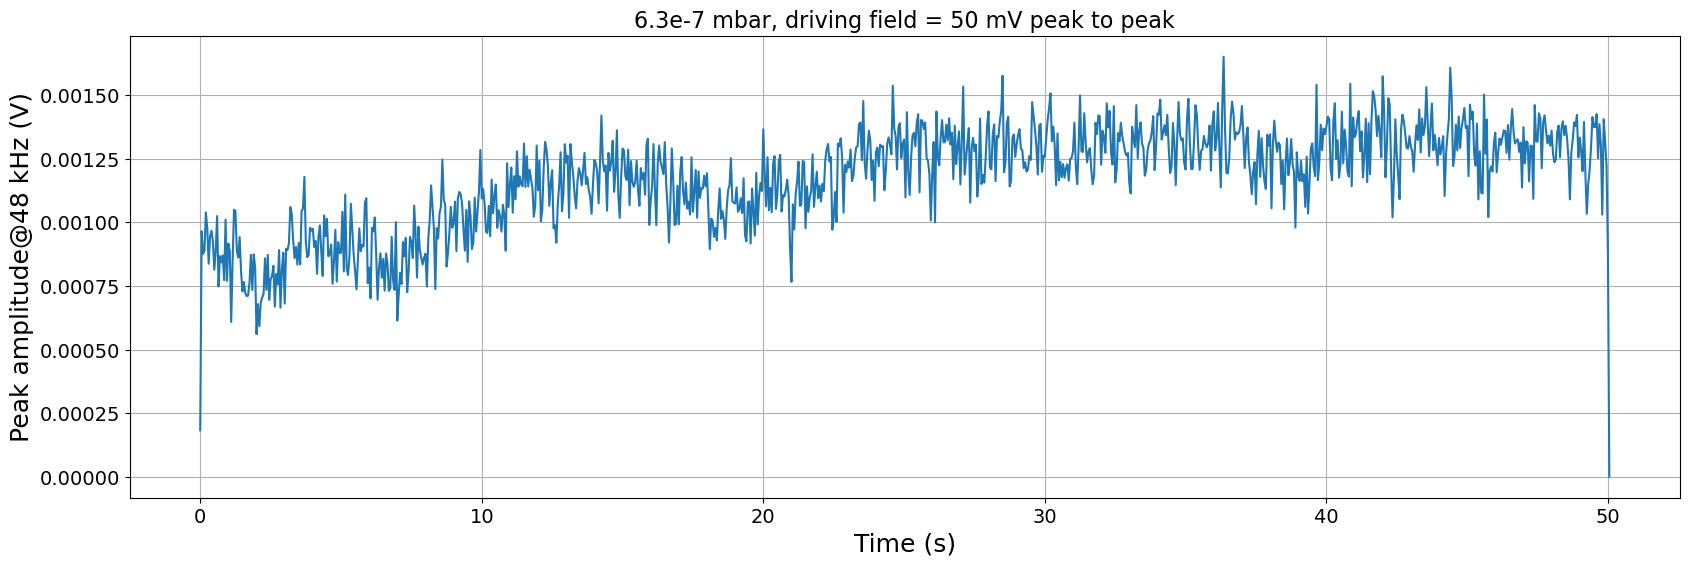

In [25]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 10

tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (20, 6))
ax.grid()
ax.plot(tt, sig, '-')

# for yy in np.linspace(0.0005, 0.0047, 6):
#     ax.axhline(y=yy, color='r', linestyle='--')

ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Peak amplitude@48 kHz (V)', fontsize=18)
ax.set_title('6.3e-7 mbar, driving field = 50 mV peak to peak')

Check what does the spectrum look like when driving field is on. The driving signal looks a little funny but some of the peaks are aliasing.

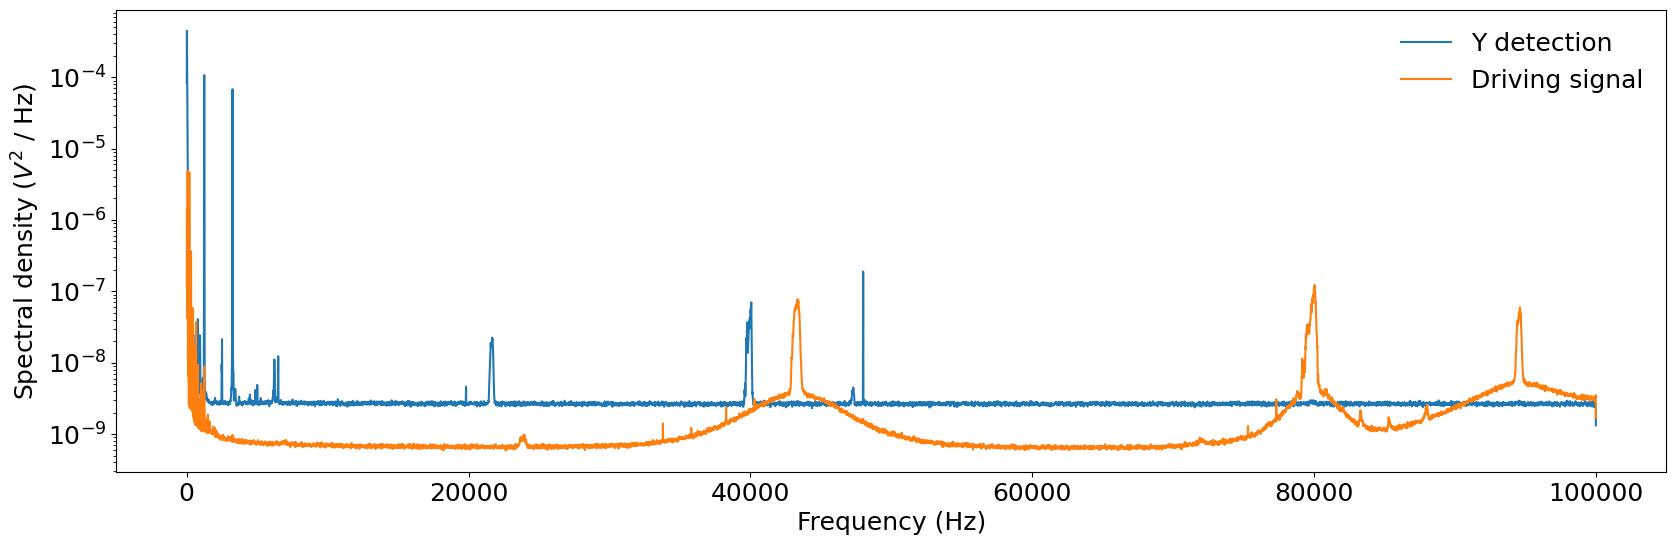

In [39]:
fig, ax = plt.subplots(figsize = (20, 6))
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)', fontsize=18)
ax.set_ylabel('Spectral density ($V^2$ / Hz)', fontsize=18)

for i in range(1, 3):
    f, p = welch(data[i], fs=fs, nperseg=fs/10)
    
    label = 'Y detection' if i==1 else 'Driving signal'
    ax.plot(f, p, label=f'{label}')
    
ax.legend(frameon=False, fontsize=18)

Apply HV doesn't seem to change the charge state (the jump at the beginning is simply when the driving E field is turned on). Also there is no visible plasma in the chamber.

In [16]:
drive_freq = 48000

data_file = r"D:\Experiment\Charging\20230904\tt_6_3e-7_50s_0_05v_hv.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

Text(0.5, 1.0, '6.3e-7 mbar, driving field = 50 mV peak to peak')

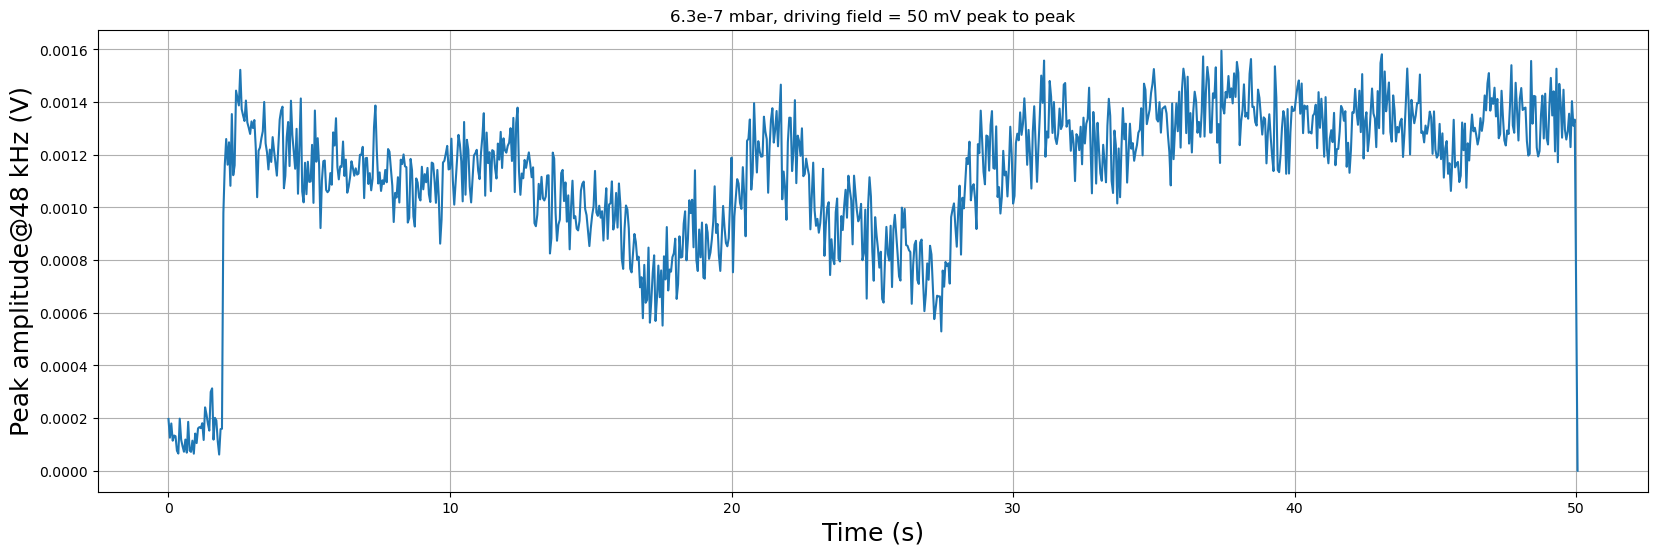

In [21]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 10

tt, sig, ff, Zxx = peak_amplitude_stft(data[1], fs, nperseg, drive_freq)

fig, ax = plt.subplots(figsize = (20, 6))
ax.grid()
ax.plot(tt, sig, '-')

# for yy in np.linspace(0.0005, 0.0047, 6):
#     ax.axhline(y=yy, color='r', linestyle='--')

ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Peak amplitude@48 kHz (V)', fontsize=18)
ax.set_title('6.3e-7 mbar, driving field = 50 mV peak to peak')

## Apply impulse

### Use the `Pulse` function on the arbitrary waveform generator
Not very conclusive because the pulses repeat too quickly.

In [66]:
data_file = r"D:\Experiment\Pulse\20230904\pulse_1v_500hz_2us.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

Text(0.5, 1.0, '1V impulse, width=2 us')

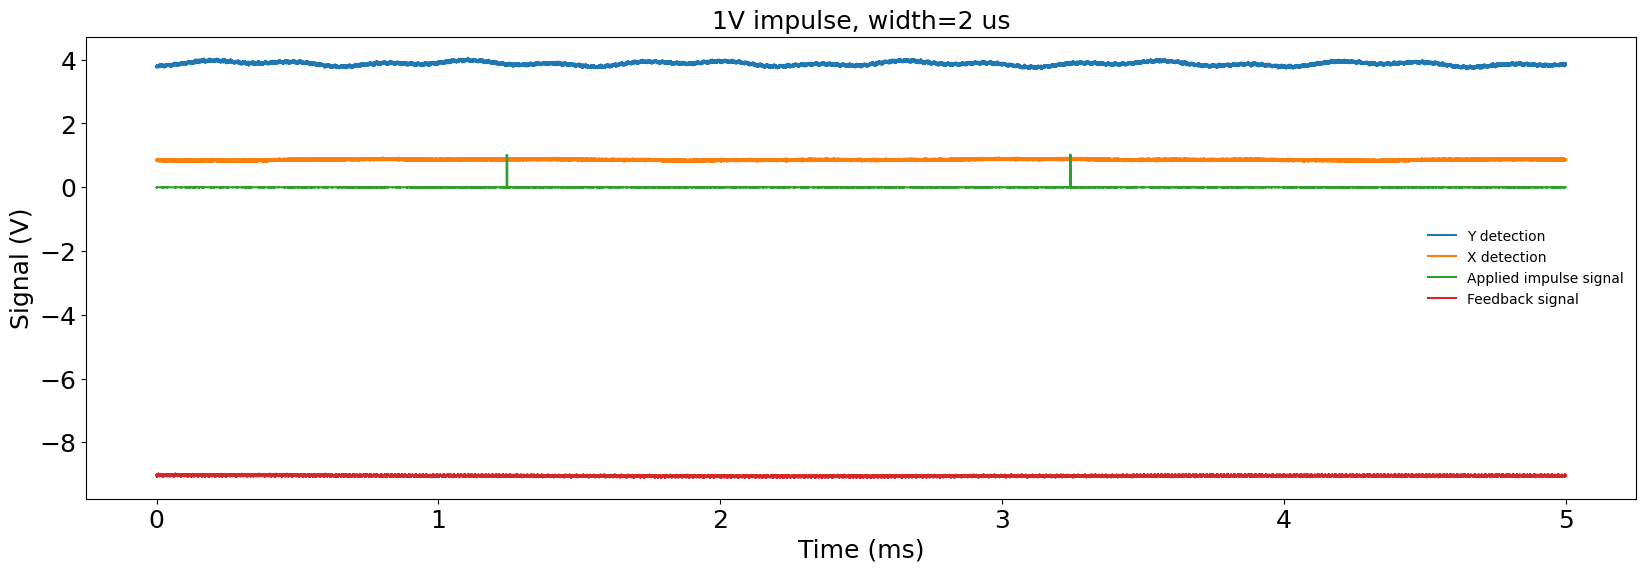

In [68]:
fig, ax = plt.subplots(figsize = (20, 6))

ax.plot(data[0], data[1], label="Y detection")
ax.plot(data[0], data[2], label="X detection")
ax.plot(data[0], data[3], label="Applied impulse signal")
ax.plot(data[0], data[4], label="Feedback signal")

ax.legend(frameon=False)
ax.set_xlabel('Time (ms)', fontsize=18)
ax.set_ylabel('Signal (V)', fontsize=18)
ax.set_title('1V impulse, width=2 us', fontsize=18)

Text(0, 0.5, 'Signal (V)')

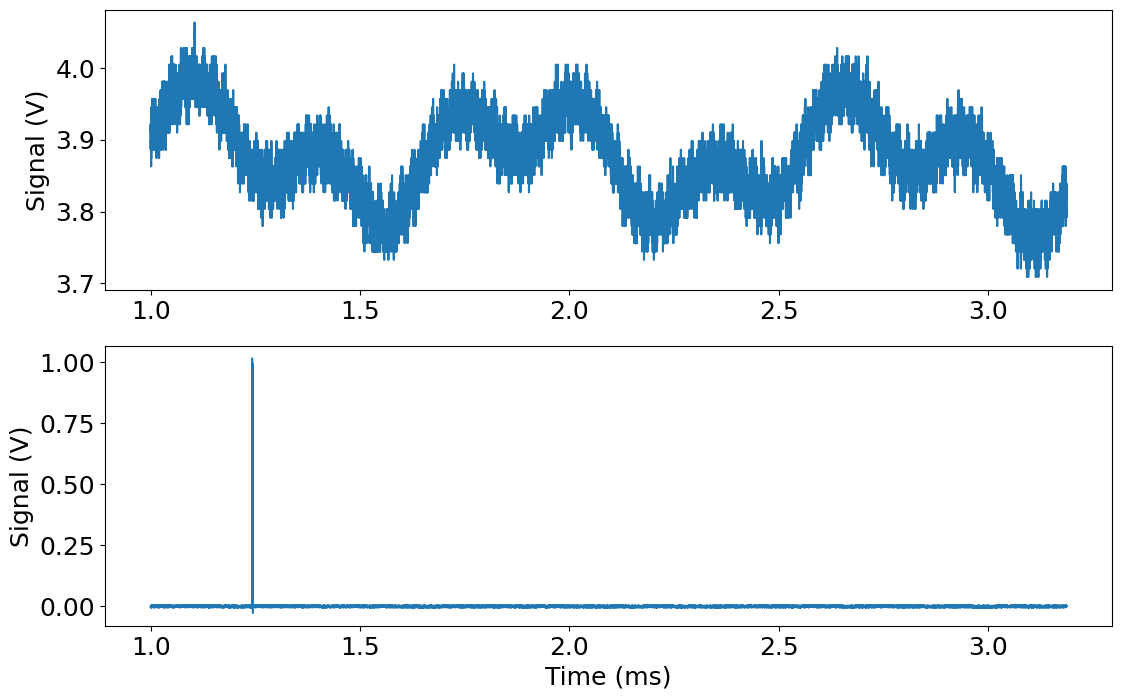

In [80]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))

lb, ub = 80000, 255000
ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[0].set_ylabel('Signal (V)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)

In [81]:
data_file = r"D:\Experiment\Pulse\20230904\pulse_3v_500hz_2us.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

Text(0, 0.5, 'Signal (V)')

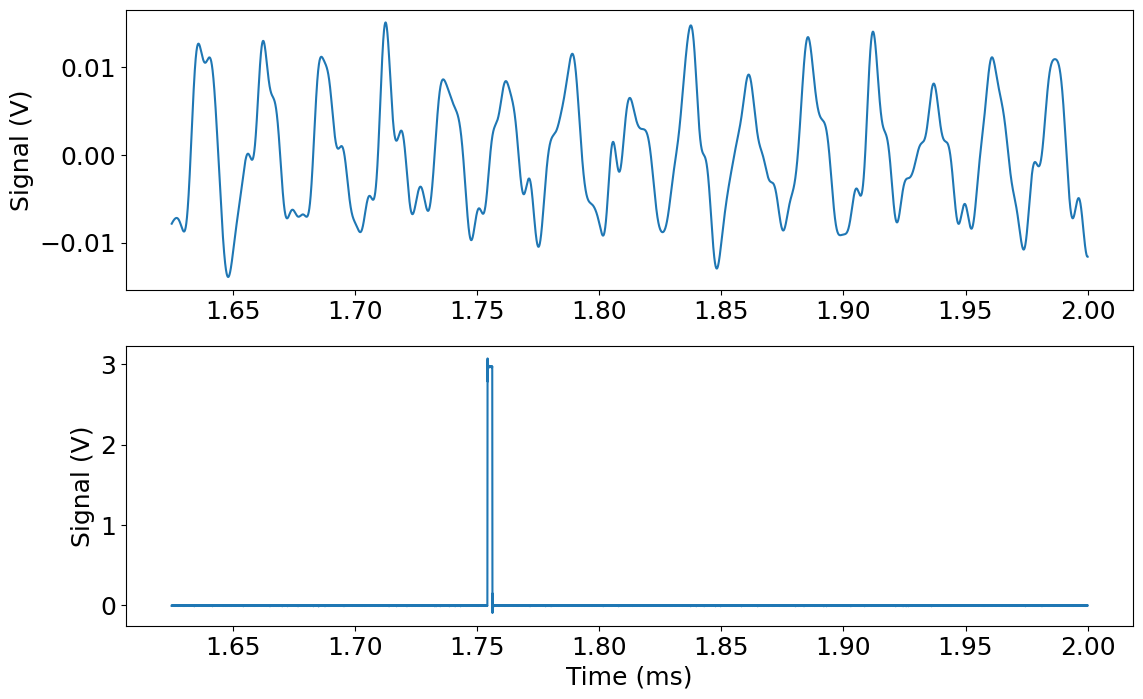

In [138]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))

lb, ub = 130000, 160000

fs = int(np.ceil(1 / (data[0, 1] - data[0, 0]))) * 1000 # Sampling rate in Hz
sos_hp = butter(8, 20000, 'hp', fs=fs, output='sos')
sos_lp = butter(8, 150000, 'lp', fs=fs, output='sos')
filtered = sosfilt(sos_hp, data[1])
filtered_filtered = sosfilt(sos_lp, filtered)

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[0].set_ylabel('Signal (V)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)

10 V x 2 us impulse

In [6]:
data_file = r"D:\Experiment\Pulse\20230905\pulse_10v_500hz_2us.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

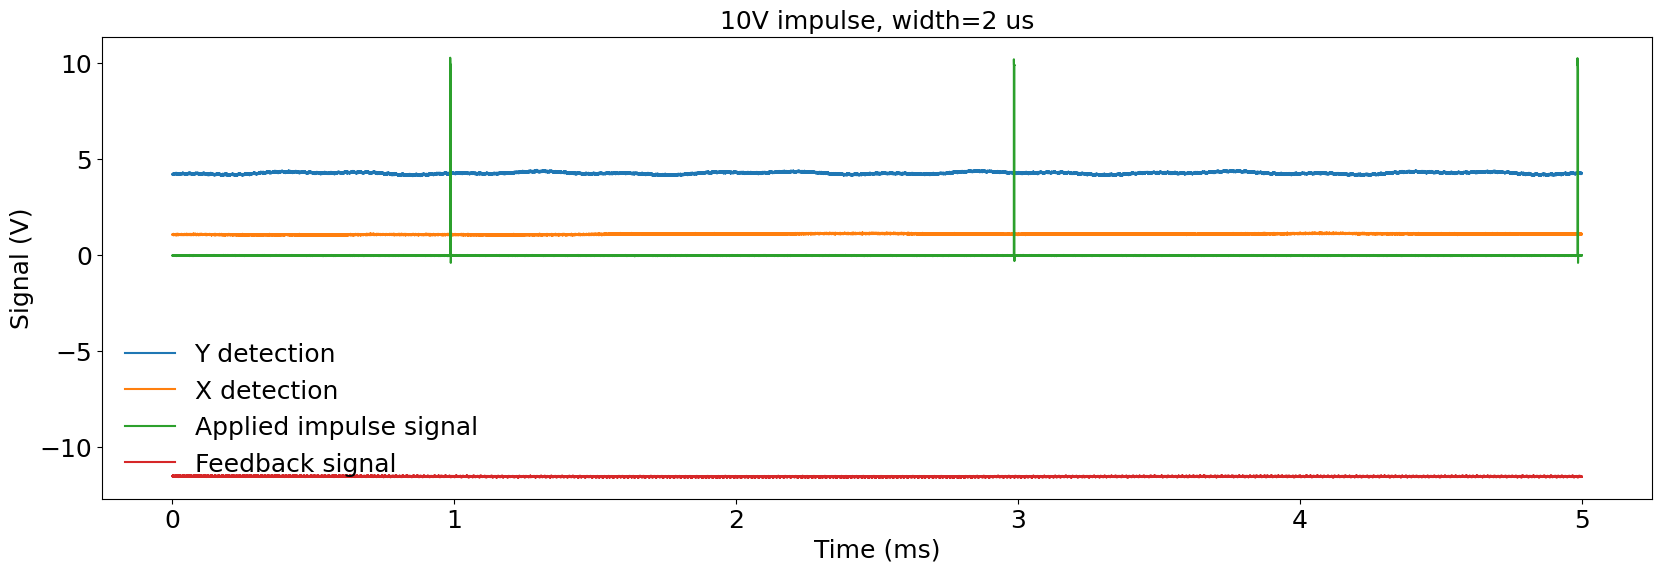

In [10]:
fig, ax = plot_tod(data, '10V impulse, width=2 us')

In [23]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0]))) * 1000 # Sampling rate in Hz
sos_hp = butter(8, 10000, 'hp', fs=fs, output='sos')
sos_lp = butter(8, 100000, 'lp', fs=fs, output='sos')
filtered = sosfilt(sos_hp, data[1])
filtered_filtered = sosfilt(sos_lp, filtered)

Text(0, 0.5, 'Signal (V)')

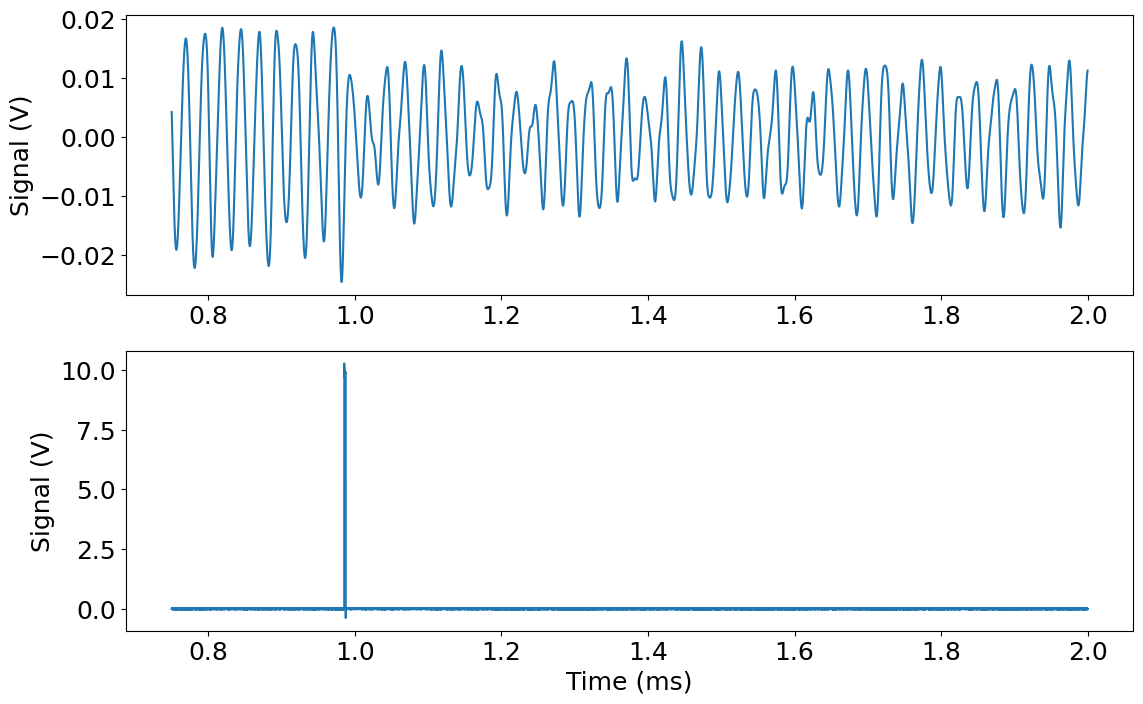

In [24]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
lb, ub = 60000, 160000

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[0].set_ylabel('Signal (V)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)

Text(0, 0.5, 'Signal (V)')

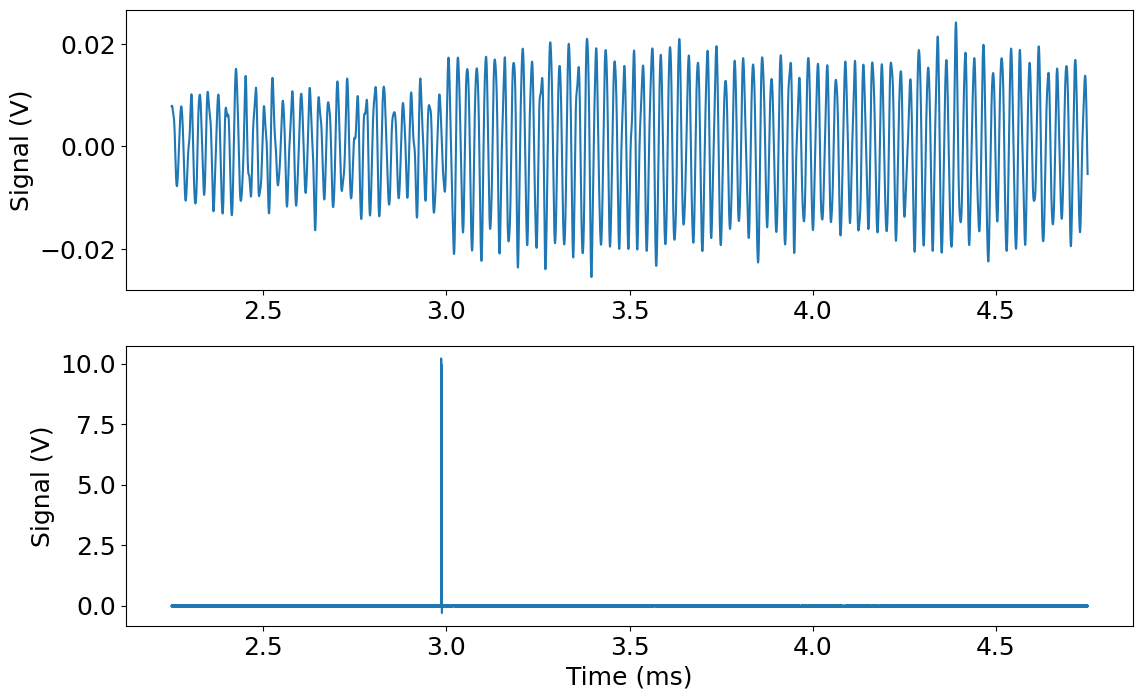

In [27]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
lb, ub = 180000, 380000

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[0].set_ylabel('Signal (V)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)

Not very conclusive evidence - a 10V pulse for 2 us is ~2 MeV with a single charge and should be observable. It's doing something to the particle, but the pulse repetition is too fast that the particle doesn't have enough time to ring down.

In [28]:
data_file = r"D:\Experiment\Pulse\20230905\pulse_10v_10hz_20us.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

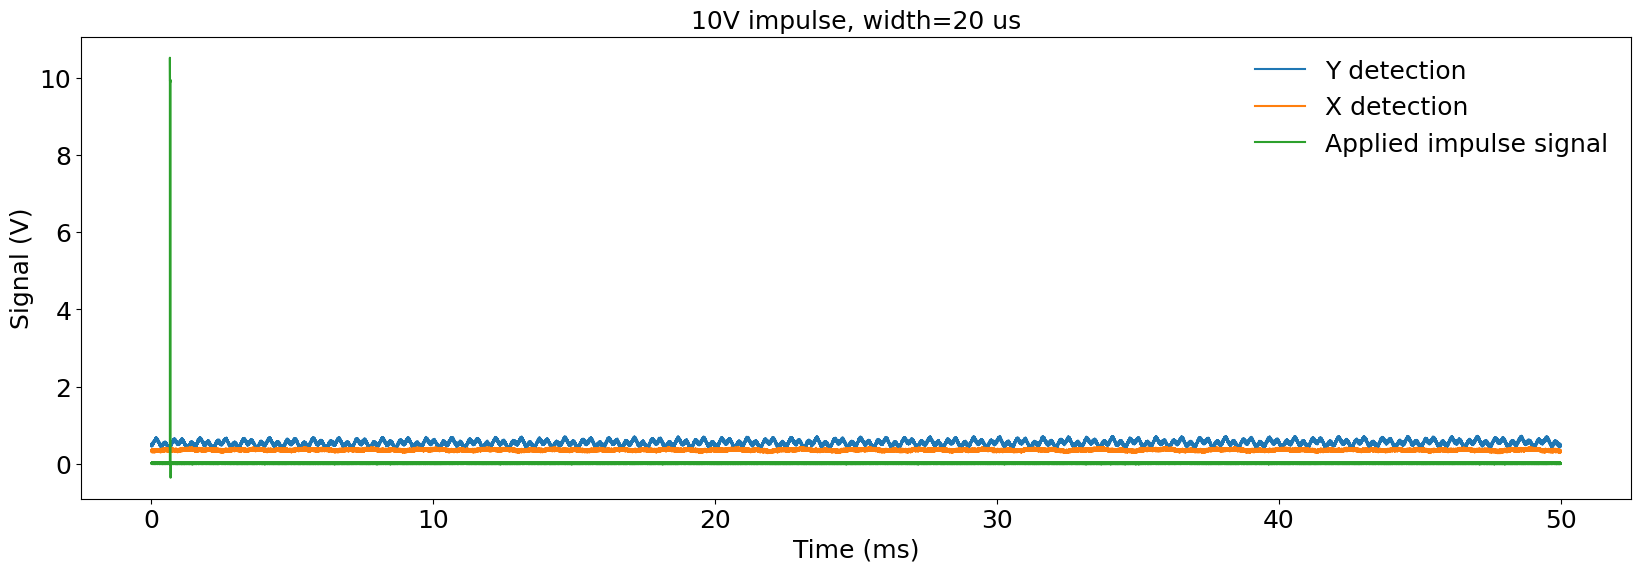

In [30]:
fig, ax = plot_tod(data, '10V impulse, width=20 us')

In [32]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0]))) * 1000 # Sampling rate in Hz
sos_hp = butter(8, 10000, 'hp', fs=fs, output='sos')
sos_lp = butter(8, 100000, 'lp', fs=fs, output='sos')
filtered = sosfilt(sos_hp, data[1])
filtered_filtered = sosfilt(sos_lp, filtered)

Text(0, 0.5, 'Signal (V)')

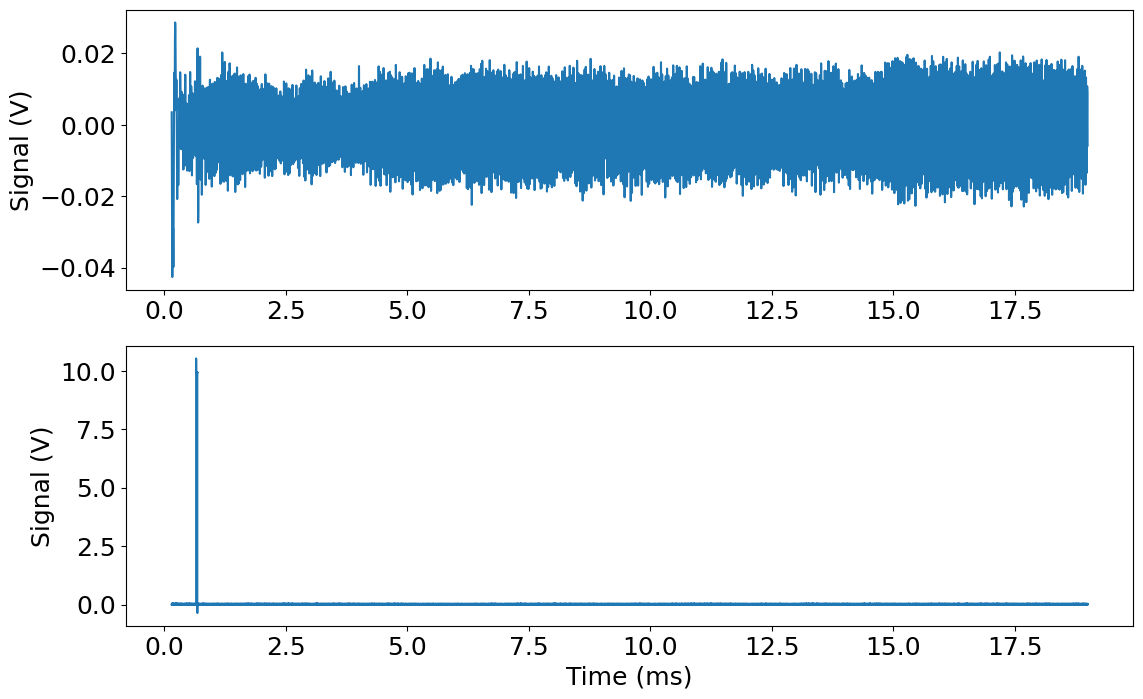

In [36]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
lb, ub = 3000, 380000

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[0].set_ylabel('Signal (V)', fontsize=18)
ax[1].set_ylabel('Signal (V)', fontsize=18)

### Use arbitrary function to create a pulse
Manage to generate pulses as narrow as ~12.5 us that repeat at 20 Hz.

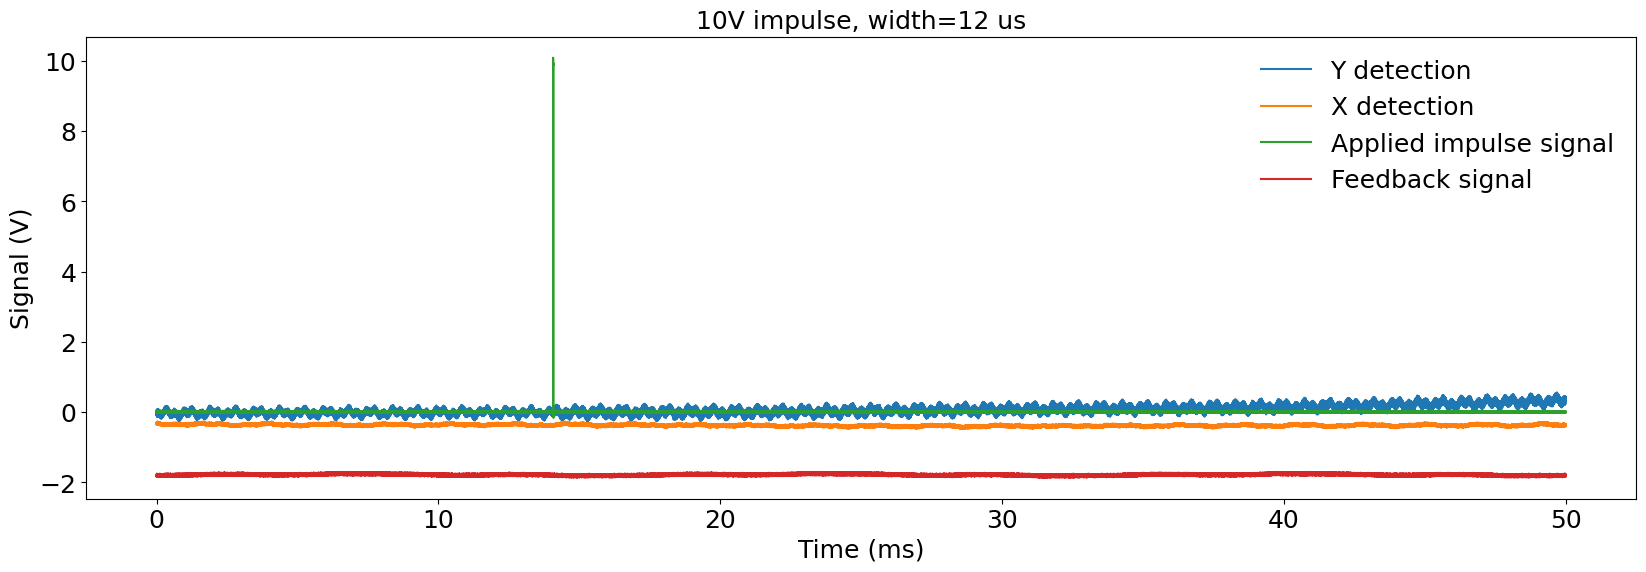

In [98]:
data_file = r"D:\Experiment\Pulse\20230905\pulse_10v_20hz_12us.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T
filtered_filtered = get_filtered_signal(data)

fig, ax = plot_tod(data, '10V impulse, width=12 us')

Text(0.5, 0.95, 'Impulse = 10V x 12.18 us $\\approx$ 10 MeV')

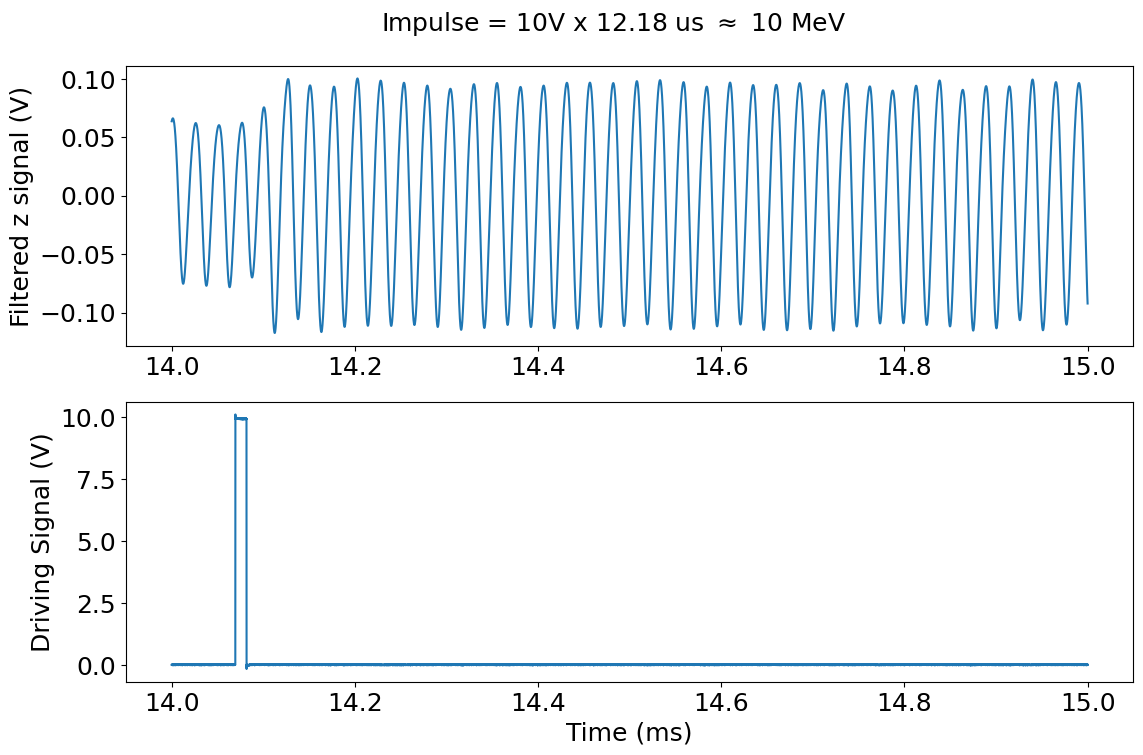

In [99]:
fig, ax = plt.subplots(2, 1, figsize = (13, 8))
# lb, ub = 40000, 5000000
lb, ub = 280000, 300000

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[0].set_ylabel('Filtered z signal (V)', fontsize=18)
ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[1].set_ylabel('Driving Signal (V)', fontsize=18)

plt.suptitle(r'Impulse = 10V x 12.18 us $\approx$ 10 MeV', y=0.95, fontsize=18)

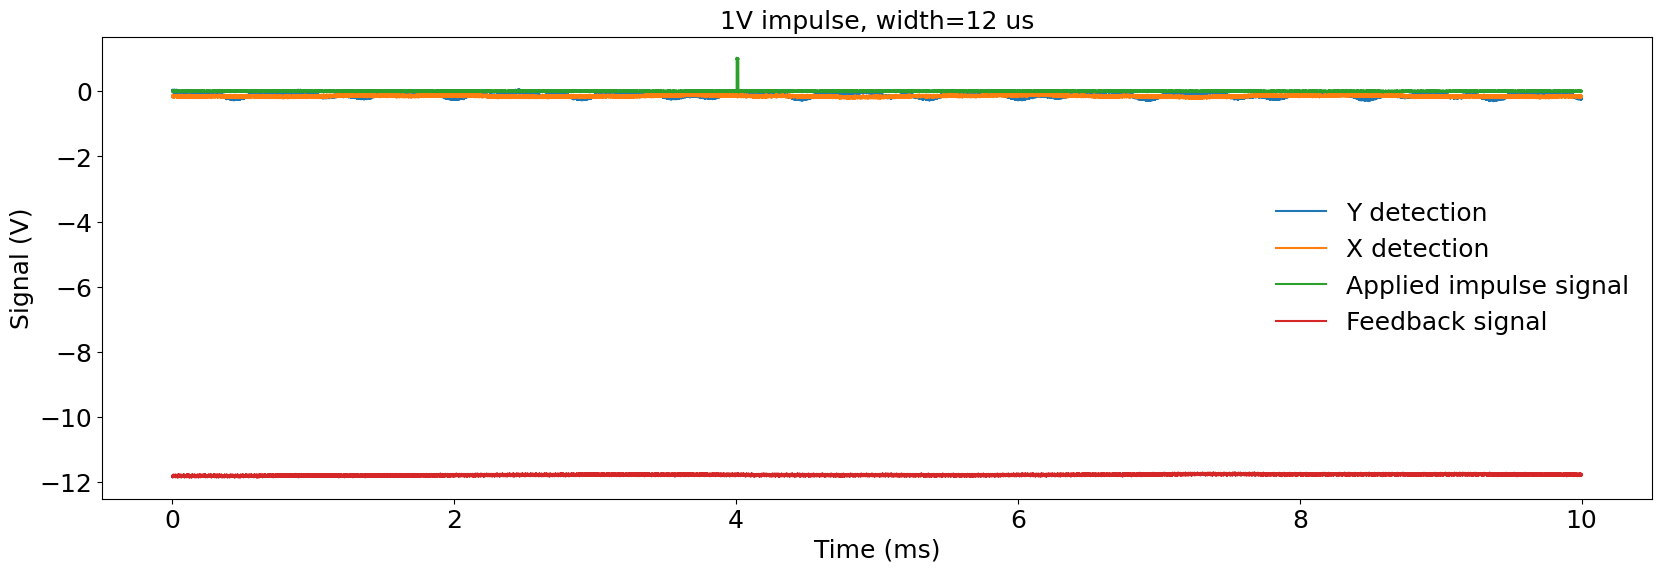

In [117]:
data_file = r"D:\Experiment\Pulse\20230905\pulse_1v_20hz_12us_3.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fig, ax = plot_tod(data, '1V impulse, width=12 us')

Text(0.5, 0.95, 'Impulse = 1V x 12.18 us $\\approx$ 1 MeV')

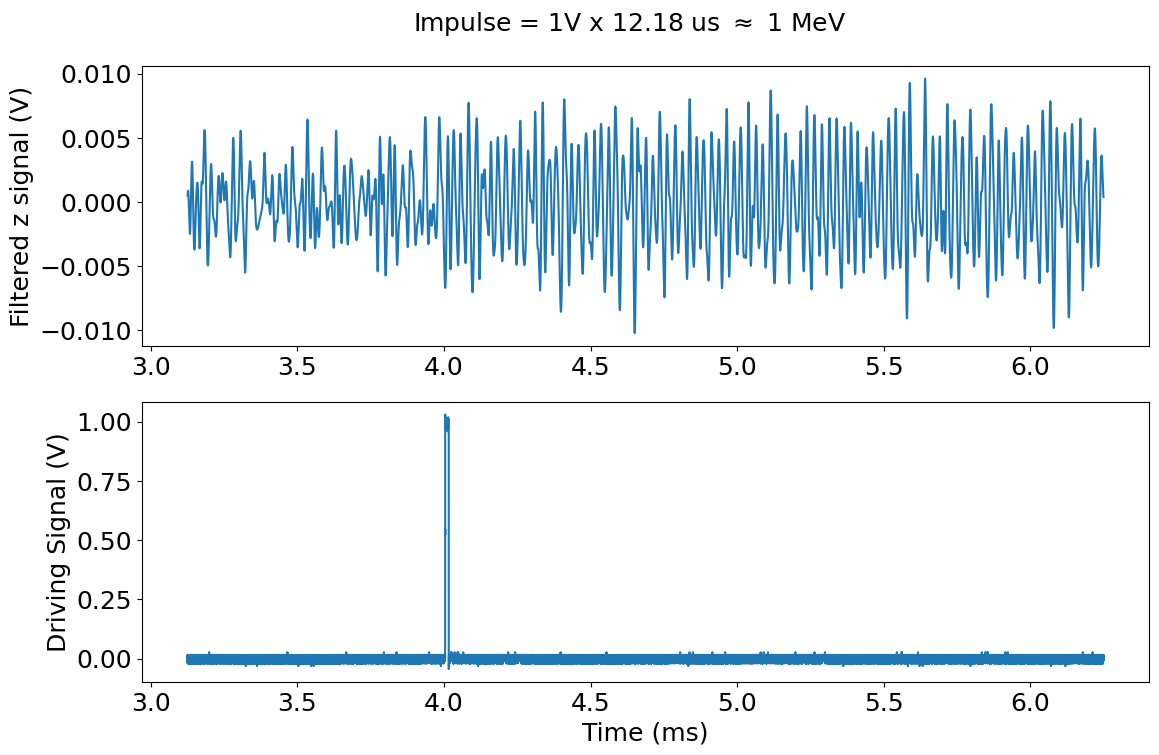

In [118]:
filtered_filtered = get_filtered_signal(data, f_hp=15000, f_lp=80000)

fig, ax = plt.subplots(2, 1, figsize = (13, 8))
# lb, ub = 35000, 5000000
lb, ub = 250000, 500000

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[0].set_ylabel('Filtered z signal (V)', fontsize=18)
ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[1].set_ylabel('Driving Signal (V)', fontsize=18)

plt.suptitle(r'Impulse = 1V x 12.18 us $\approx$ 1 MeV', y=0.95, fontsize=18)

### 5 MeV impulse

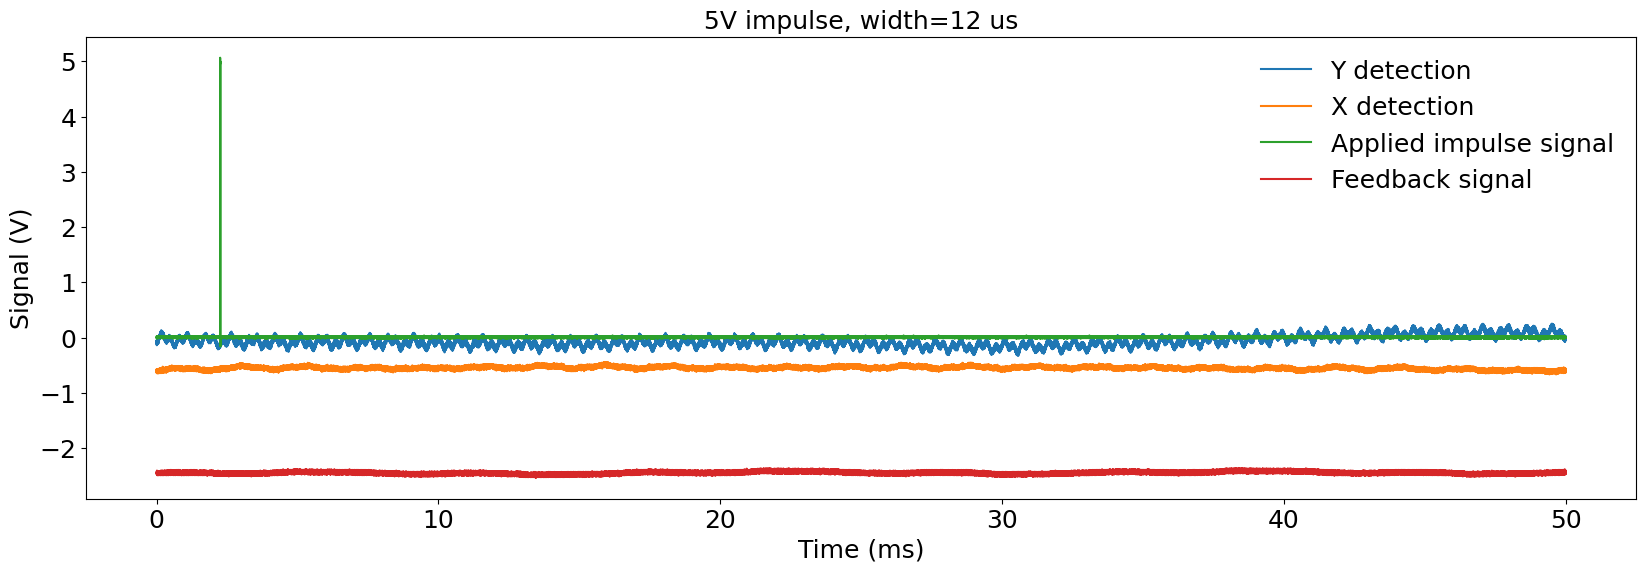

In [119]:
data_file = r"D:\Experiment\Pulse\20230905\pulse_5v_20hz_12us.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fig, ax = plot_tod(data, '5V impulse, width=12 us')

Text(0.5, 0.95, 'Impulse = 5V x 12.18 us $\\approx$ 5 MeV')

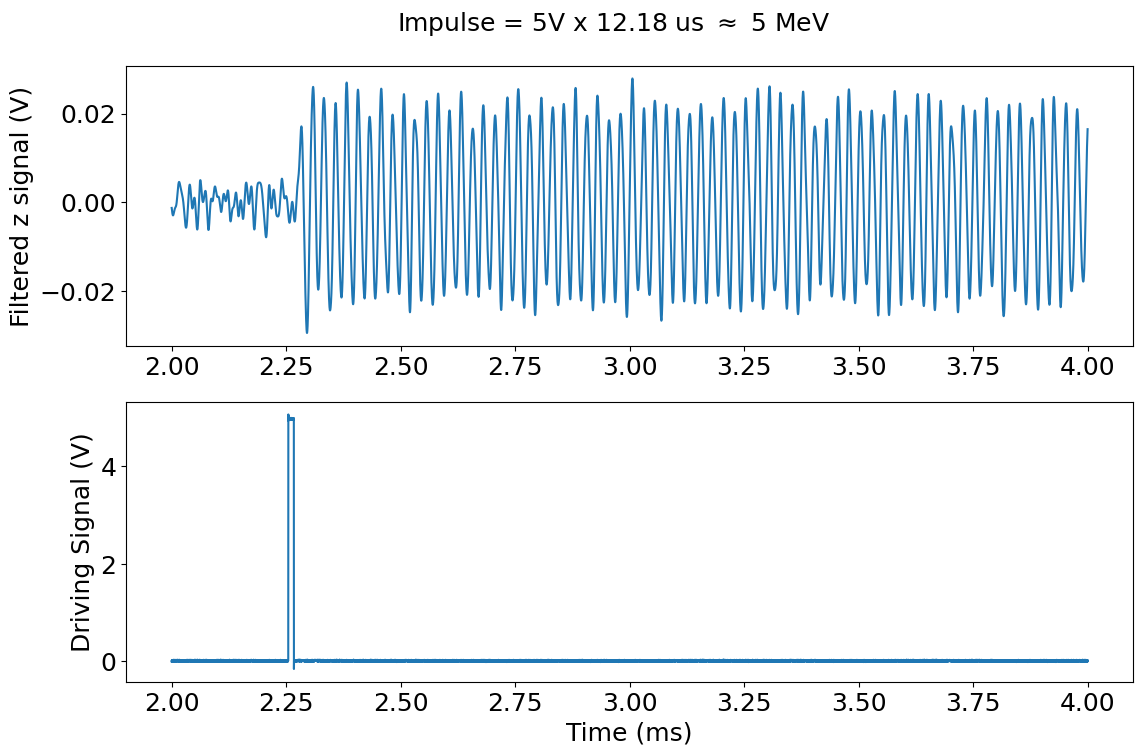

In [125]:
filtered_filtered = get_filtered_signal(data)

fig, ax = plt.subplots(2, 1, figsize = (13, 8))
# lb, ub = 40000, 5000000
lb, ub = 40000, 80000

# ax[0].plot(data[0, lb:ub], data[1, lb:ub], label="Y detection")
ax[0].plot(data[0, lb:ub], filtered_filtered[lb:ub], label="Y detection (filtered)")
ax[1].plot(data[0, lb:ub], data[3, lb:ub], label="Applied impulse signal")

ax[0].set_ylabel('Filtered z signal (V)', fontsize=18)
ax[1].set_xlabel('Time (ms)', fontsize=18)
ax[1].set_ylabel('Driving Signal (V)', fontsize=18)

plt.suptitle(r'Impulse = 5V x 12.18 us $\approx$ 5 MeV', y=0.95, fontsize=18)